This notebook is meant for developers for developing and testing modular compoments

# Singing Voice Analysis

### Available modules:
- loadAudio
- getPitch
- getIntensity
- getSpectrogram
- getSBEOnsets

## Functionalities
Each module has some common methods that can be accessed. To know more, check out my [coding paradigm](https://github.com/meluron/codingParadigm/blob/main/guidelines.md) about class-based functional programming.

In [8]:
from IPython.display import display
from IPython.display import Audio

In [9]:
# CONSTANTS
timestep = 0.01 # sec - RECOMMENDED
sampleRate = 16000 # samples/sec - RECOMMENDED
hop = int(timestep*sampleRate)
print(f"Sample rate: {sampleRate} hz\nHop: {hop} samples")

Sample rate: 16000 hz
Hop: 160 samples


In [10]:
audioFp = "../tmp/AS06_gaudiolab_vocal_seg_01.wav"

## Audio Player

In [11]:
Audio(audioFp, rate=sampleRate)

## Waveform

In [12]:
audioControls = {
    "targetSampleRate": sampleRate
}

In [13]:
from loadAudio import loadAudio

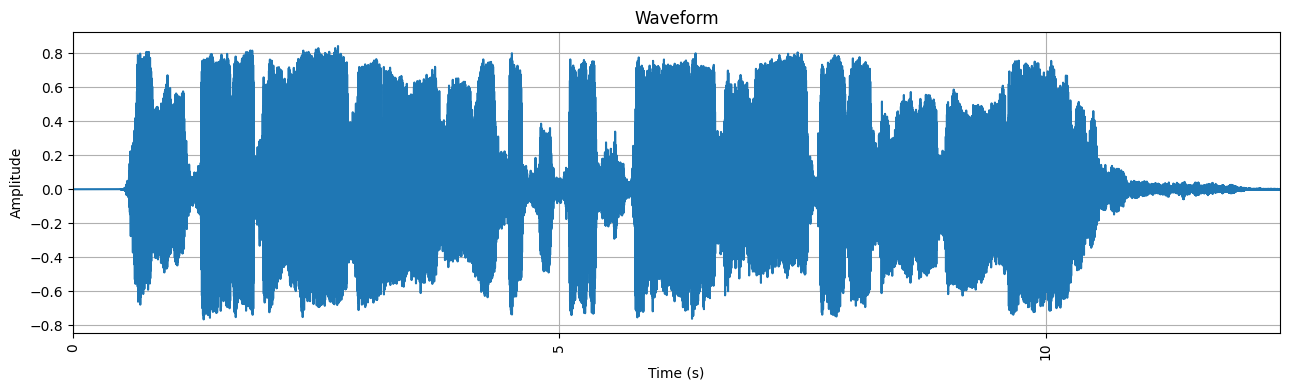

In [14]:
la = loadAudio(audioFp=audioFp, controls=None).run()
audioSignal, audioSr = la.outs.values()
figWaveform = la.plot(show=True)

## Pitch Contour

In [15]:
from getPitch import getPitch

In [16]:
pitchControls = {
    "time_step": timestep,  # time step between consecutive pitch measurements (in seconds)
    "pitch_floor": 75.0, # minimum pitch value to detect (in Hz), useful for filtering out low-frequency noise
    "max_number_of_candidates": 15, # max number of pitch candidates per frame to evaluate
    "very_accurate": False, # increases accuracy at the cost of performance
    "silence_threshold": 0.01, # energy threshold to distinguish silence from voiced parts
    "voicing_threshold": 0.35, # threshold for deciding whether a frame is voiced
    "octave_cost": 0.05, # cost for selecting a pitch candidate an octave apart from the previous one
    "octave_jump_cost": 0.35, # penalty for sudden jumps between octaves
    "voiced_unvoiced_cost": 0.4, # cost for transitioning between voiced and unvoiced frames
    "pitch_ceiling": 600 # maximum pitch to detect (in hz)
}

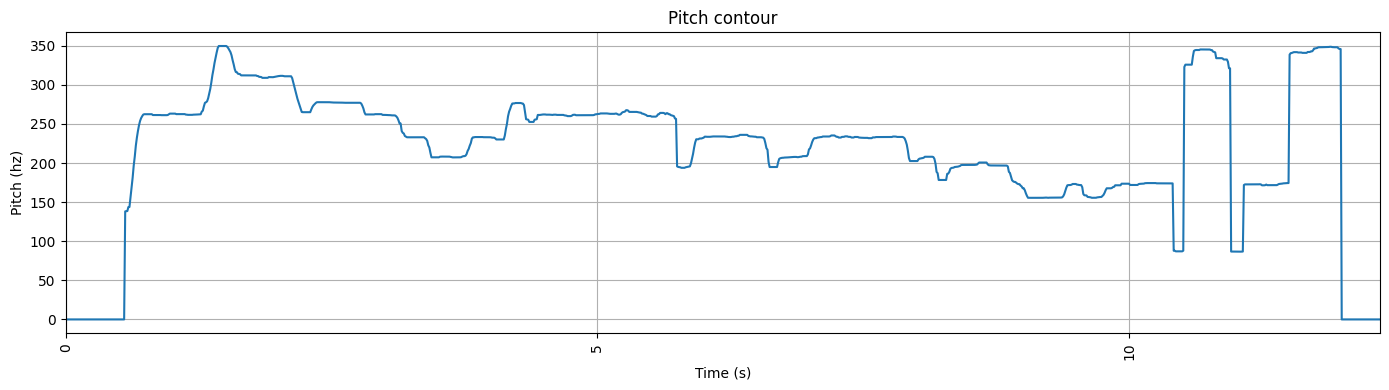

In [17]:
gp = getPitch(audioSignal=audioSignal, audioSr=audioSr, controls=None).run()
figPitchContour = gp.plot(show=True);

## Intensity Contour

In [18]:
intensityControls = {
    "minimum_pitch": 75.0,  # min pitch (in Hz) used for intensity calculation; helps focus on voiced parts
    "time_step": timestep,      # time step between consecutive intensity measurements (in seconds)
    "subtract_mean": False  # Whether to subtract the mean intensity; useful for normalization
}

In [19]:
from getIntensity import getIntensity

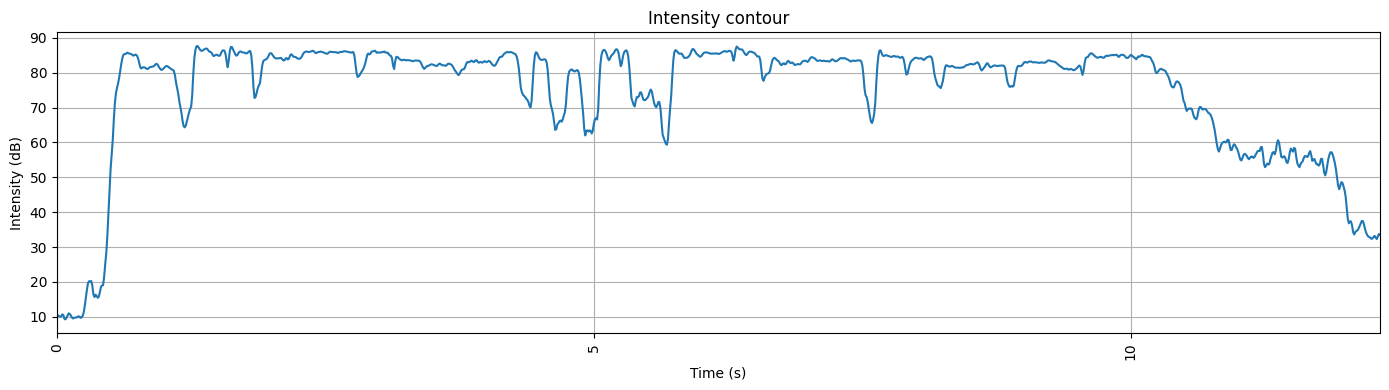

In [20]:
gi = getIntensity(audioSignal=audioSignal, audioSr=audioSr, controls=None).run()
figIntensity = gi.plot(True)

## Spectrogram

In [21]:
spectrogramControls = {
    "N": 512,
    "H": 160,
} # is it needed?

In [22]:
from getSpectrogram import getSpectrogram

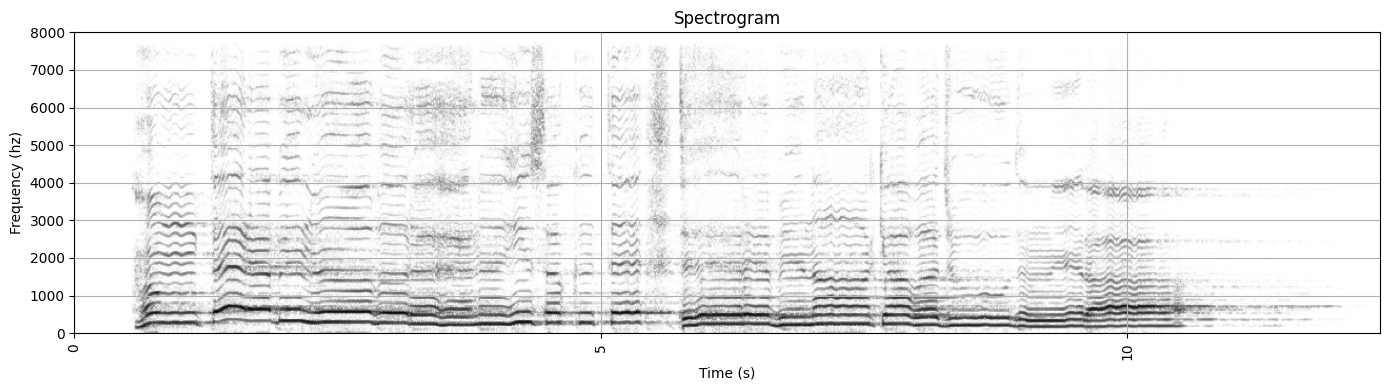

In [23]:
gs = getSpectrogram(audioSignal=audioSignal, audioSr=audioSr).run()
figSpectrogram = gs.plot(True)

## Sub-band energy onsets

In [24]:
SBEOnsetsControls = {
    "promsThreshold": None # 0 to 1; filter onsets with prominence above this threshold
}

In [25]:
from getSBEOnsets import getSBEOnsets

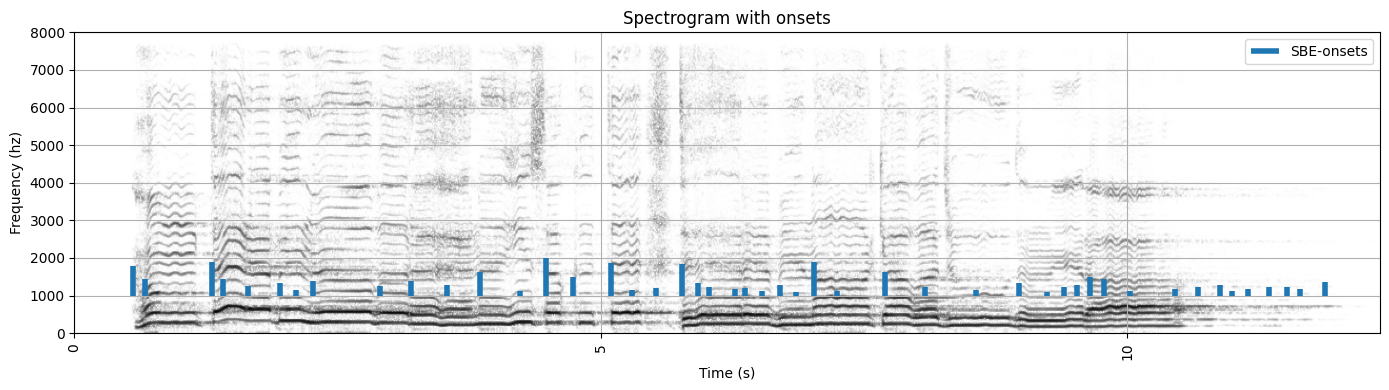

In [26]:
gvo = getSBEOnsets(audioSignal=audioSignal, audioSr=audioSr, controls=None).run(debugMode=True)
figVowelOnsets = gvo.plot(True)

## Stitching the modules together

In [27]:
# CONTROLS
audioControls = {
    "targetSampleRate": 16000
    }

pitchControls = {
    "time_step": 0.01,  # time step between consecutive pitch measurements (in seconds)
    "pitch_floor": 75.0, # minimum pitch value to detect (in Hz), useful for filtering out low-frequency noise
    "max_number_of_candidates": 15, # max number of pitch candidates per frame to evaluate
    "very_accurate": False, # increases accuracy at the cost of performance
    "silence_threshold": 0.01, # energy threshold to distinguish silence from voiced parts
    "voicing_threshold": 0.35, # threshold for deciding whether a frame is voiced
    "octave_cost": 0.05, # cost for selecting a pitch candidate an octave apart from the previous one
    "octave_jump_cost": 0.35, # penalty for sudden jumps between octaves
    "voiced_unvoiced_cost": 0.4, # cost for transitioning between voiced and unvoiced frames
    "pitch_ceiling": 600 # maximum pitch to detect (in hz)
    }

intensityControls = {
    "minimum_pitch": 75.0,  # min pitch (in Hz) used for intensity calculation; helps focus on voiced parts
    "time_step": 0.01,      # time step between consecutive intensity measurements (in seconds)
    "subtract_mean": False  # Whether to subtract the mean intensity; useful for normalization
}
SBEOnsetsControls = {
    "promsThreshold": None # 0 to 1; filter onsets with prominence above this threshold
}

In [28]:
from analyseSingingVoiceAcoustics import analyseSingingVoiceAcoustics

In [29]:
asva = analyseSingingVoiceAcoustics(
    audioFp="../tmp/AS6_1.wav", 
    gtTxtFp="../tmp/AS6_1_gt.txt",
    hubertTxtFp="../tmp/06001_timestamps.txt",
    audioControls=audioControls, 
    pitchControls=pitchControls, 
    intensityControls=intensityControls, 
    SBEOnsetsControls=SBEOnsetsControls
).run(debugMode=True)

In [30]:
audioSignal, audioSr, pitchValues, pitchTs, intensityValues, intensityTs, powerSpec, fs, ts, onsets, proms = asva.outs.values()
fig = asva.plot()

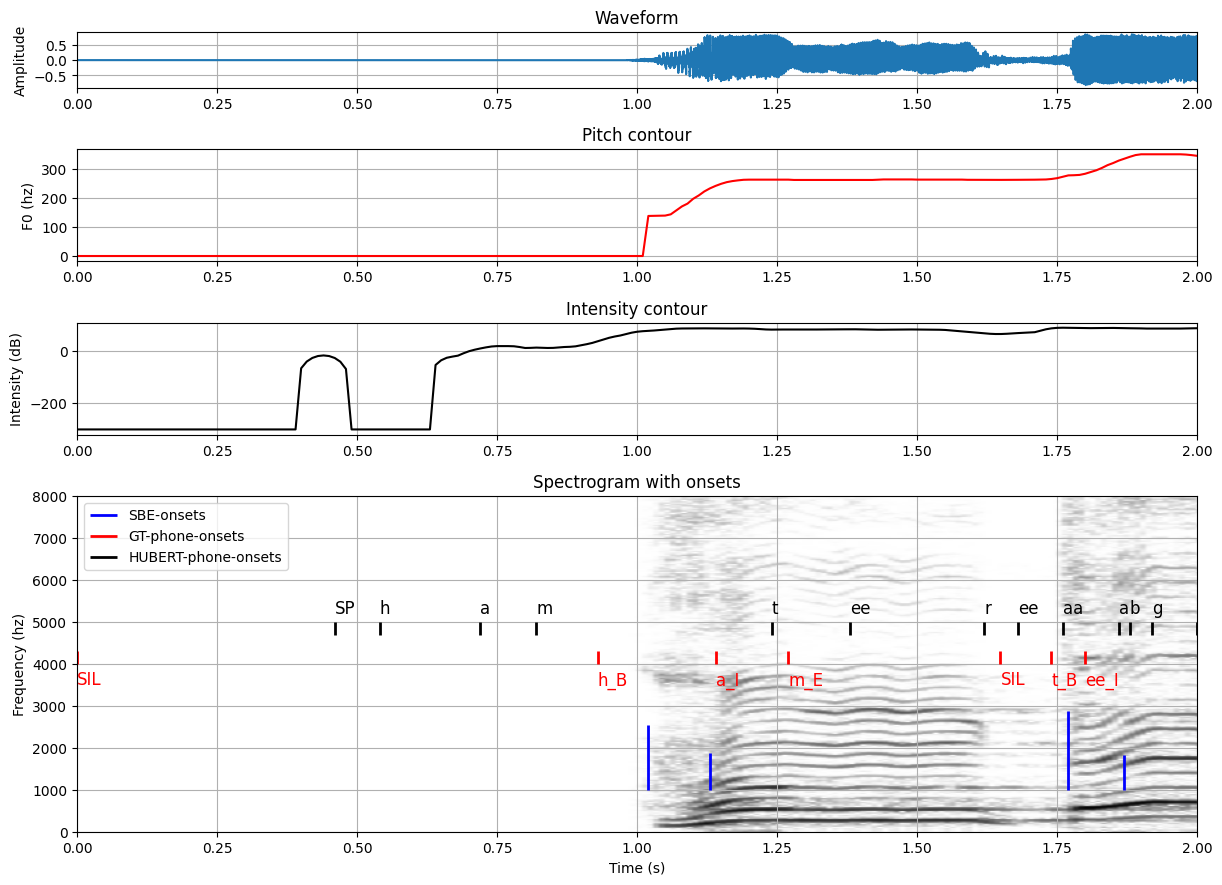

In [31]:
zoom = [0, 2]
# Assuming `fig` was created previously
fig.axes[0].set_xlim(zoom[0], zoom[-1])  # Set xlim for the first axis
fig.axes[1].set_xlim(zoom[0], zoom[-1])  # Set for the second axis if needed, and so on
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4)
display(fig)

In [57]:
gtLabelsFp = "../tmp/AS6_1_gt.txt"
hubertLabelsFp = "../tmp/06001_timestamps.txt"

In [58]:
with open(gtLabelsFp,  "r") as f:
    content = [line.split("\t") for line in f.read().split("\n")]

In [59]:
gtOnsets = np.array([float(line[0]) for line in content if line and line[0].strip])
gtPhones = np.array([line[2] for line in content if line and line[0].strip])

In [60]:
with open(hubertLabelsFp, "r") as f:
    content = [line.split("\t") for line in f.read().split("\n")]

In [61]:
hubertOnsets = np.array([float(line[0]) for line in content if line and line[0].strip()]) # the condition is to avoid any sort of empty line in the txt
hubertPhones = np.array([line[1] for line in content if line and line[0].strip()]) # the condition is to avoid any sort of empty line in the txt

In [62]:
gtOnsets, gtPhones

(array([ 0.      ,  0.93    ,  1.14    ,  1.269908,  1.648814,  1.739268,
         1.8     ,  2.07    ,  2.1     ,  2.34    ,  2.427995,  2.58    ,
         3.071139,  3.254895,  3.649471,  3.75773 ,  4.10245 ,  4.23    ,
         4.32    ,  4.494177,  4.572522,  4.77    ,  4.8     ,  4.95    ,
         5.1     ,  5.25    ,  5.4     ,  5.55    ,  5.885876,  6.17789 ,
         6.279027,  6.675027,  6.80038 ,  7.08    ,  7.18356 ,  7.38    ,
         7.5     ,  8.04    ,  8.090586,  8.152906,  8.22    ,  8.37    ,
         8.481957,  8.67    ,  8.76    ,  9.348742,  9.448454,  9.589476,
        10.05    , 10.11    , 11.427031]),
 array(['SIL', 'h_B', 'a_I', 'm_E', 'SIL', 't_B', 'ee_I', 'r_I', 'ee_E',
        'b_B', 'i_I', 'n_E', 'a_B', 'b_E', 'r_B', 'a_I', 'h_E', 'n_B',
        'a_I', 'h_I', 'ii_I', 'q_E', 's_B', 'a_I', 'k_I', 'a_I', 't_I',
        'ee_E', 'SIL', 't_B', 'ee_I', 'r_I', 'ee_E', 'b_B', 'i_I', 'n_I',
        'aa_E', 'SIL', 'k_B', 'y_I', 'aa_E', 'w_B', 'a_I', 'j_I', 'uu_I',
 

In [48]:
hubertOnsets, hubertPhones

(array([0.46, 0.54, 0.72, 0.82, 1.24, 1.38, 1.62, 1.68, 1.76, 1.86, 1.88,
        1.92, 2.  , 2.12, 2.56, 2.82, 2.96, 3.14, 3.24, 3.36, 3.72, 3.78,
        3.88, 4.08, 4.22, 4.36, 4.52, 4.66, 4.98, 5.12, 5.44, 5.72, 5.82,
        6.34, 6.4 , 6.64, 6.72, 6.74, 6.86, 6.92, 7.04, 7.6 , 7.72, 7.94,
        8.  , 8.04, 8.2 , 8.22, 8.3 , 8.34, 8.62, 8.84, 8.9 , 9.  , 9.08,
        9.14, 9.28, 9.32, 9.58, 9.64]),
 array(['SP', 'h', 'a', 'm', 't', 'ee', 'r', 'ee', 'aa', 'a', 'b', 'g',
        'i', 'n', 'aa', 'b', 'a', 'r', 'a', 'h', 'ee', 'n', 'a', 'h', 'ii',
        's', 'a', 'k', 't', 'ee', 'SP', 't', 'ee', 'r', 'ee', 'b', 'p',
        'y', 'a', 'n', 'aa', 'k', 'aa', 'b', 'w', 'aa', 'a', 'jh', 'j',
        'l', 'u', 'ii', 'd', 'a', 'l', 'n', 'm', 'ee', 'r', 'aa'],
       dtype='<U2'))

In [28]:
lower, higher = 0, 2

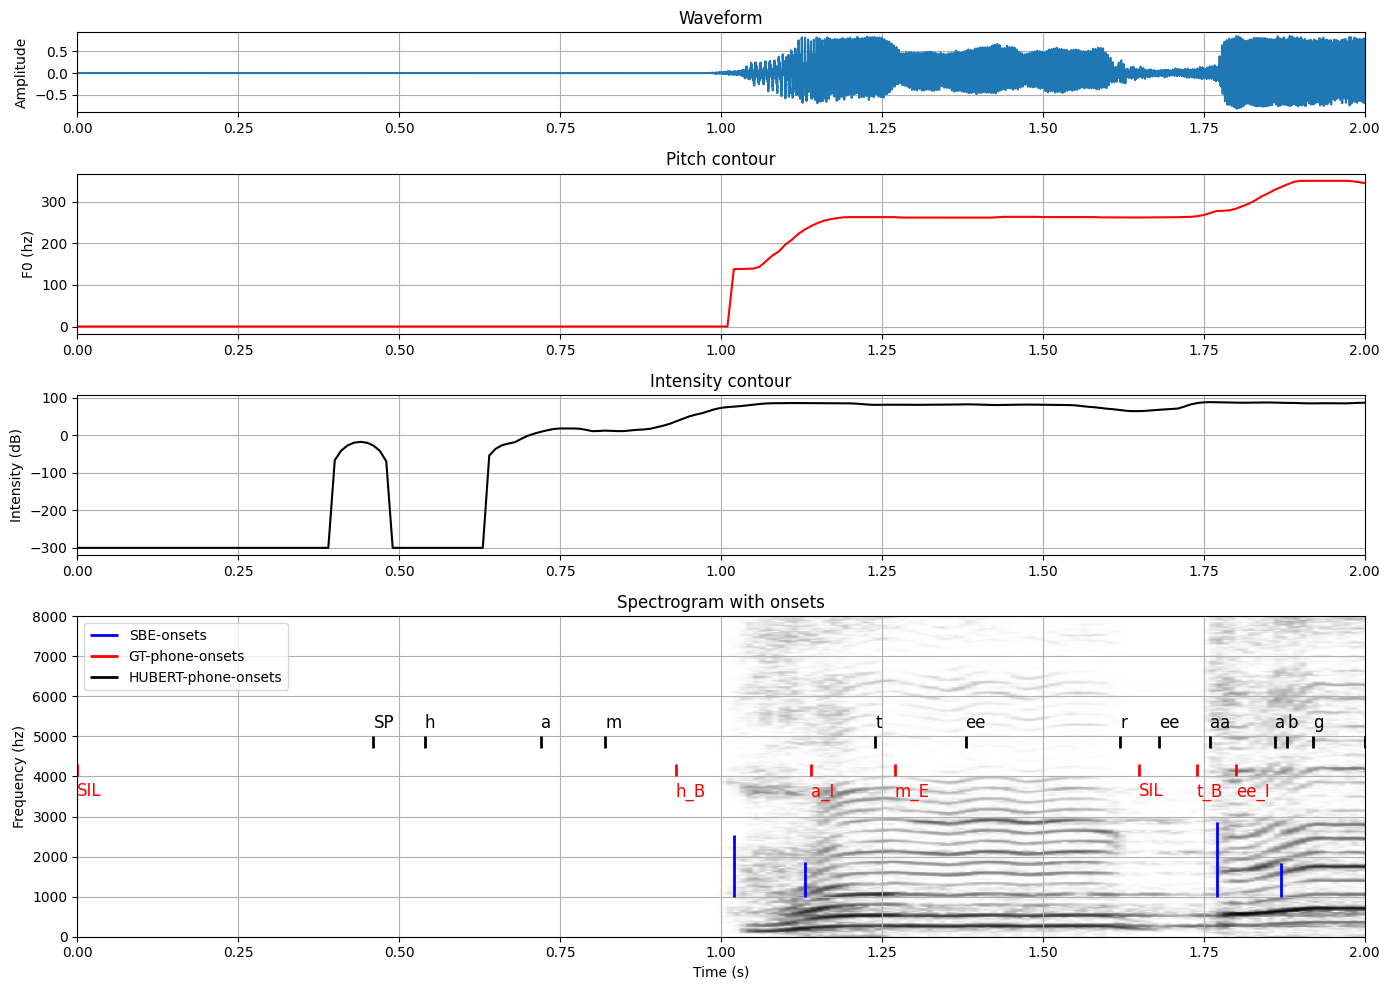

In [70]:
fig, ax = plt.subplots(nrows=4, ncols=1, width_ratios=[1], height_ratios=[0.1, 0.2, 0.2, 0.4], figsize=(14, 10), sharex=True)

ax[0].plot(np.arange(audioSignal.shape[0])/audioSr, audioSignal)
ax[0].set_title("Waveform")
ax[0].set_ylabel("Amplitude")

ax[1].plot(pitchTs, pitchValues, c="r")
ax[1].set_title("Pitch contour")
ax[1].set_ylabel("F0 (hz)")

ax[2].plot(intensityTs, intensityValues, c="k")
ax[2].set_title("Intensity contour")
ax[2].set_ylabel("Intensity (dB)")

ax[3].imshow(powerSpec, origin='lower', aspect='auto', cmap='gray_r', extent=[ts[0], ts[-1], fs[0], fs[-1]])
ax[3].vlines(onsets, np.ones(onsets.shape[0])*1000, 1000+(proms*2000), linewidth=2, color="b", label="SBE-onsets")

# GT
for gtOnset, gtPhone in zip(gtOnsets, gtPhones):
    ax[3].text(gtOnset, 3500, gtPhone, fontsize=12, color='r', clip_on=True)
ax[3].vlines(gtOnsets, 4000, 4300, linewidth=2, color="r", label="GT-phone-onsets")

# HUBERT
for hubertOnset, hubertPhone in zip(hubertOnsets, hubertPhones):
    ax[3].text(hubertOnset, 5200, hubertPhone, fontsize=12, color='k', clip_on=True)
ax[3].vlines(hubertOnsets, 4700, 5000, linewidth=2, color="k", label="HUBERT-phone-onsets")

ax[3].set_title("Spectrogram with onsets")
ax[3].set_xlabel("Time (s)")
ax[3].set_ylabel("Frequency (hz)")
ax[3].legend(loc="upper left")

for i in range(4):
    ax[i].tick_params(axis="x", labelbottom=True)
    ax[i].grid()

plt.xlim([lower, higher])
plt.tight_layout()
plt.show()

## Plots together

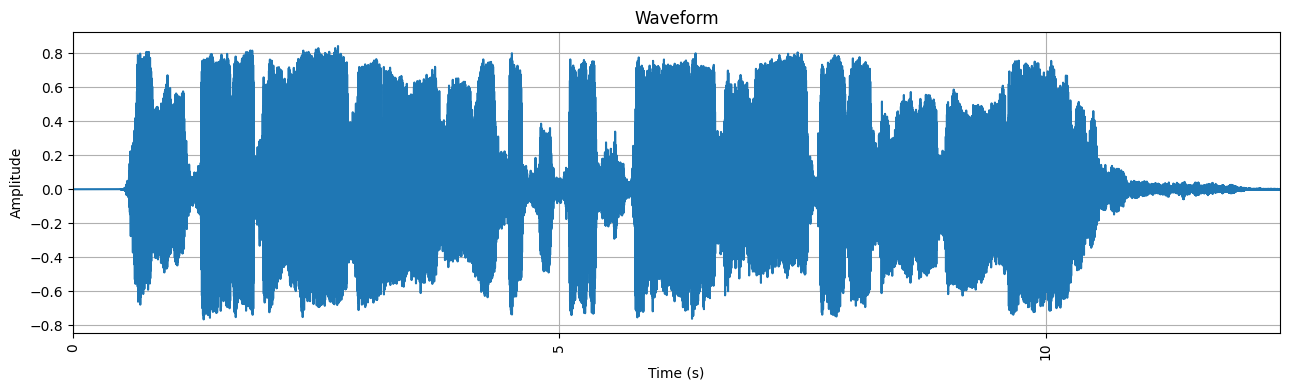

In [24]:
figWaveform

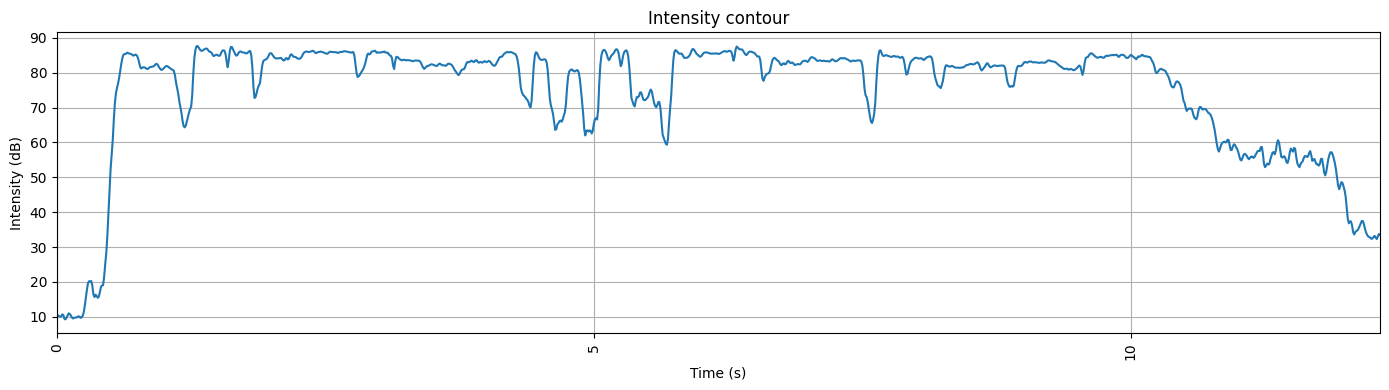

In [25]:
figIntensity

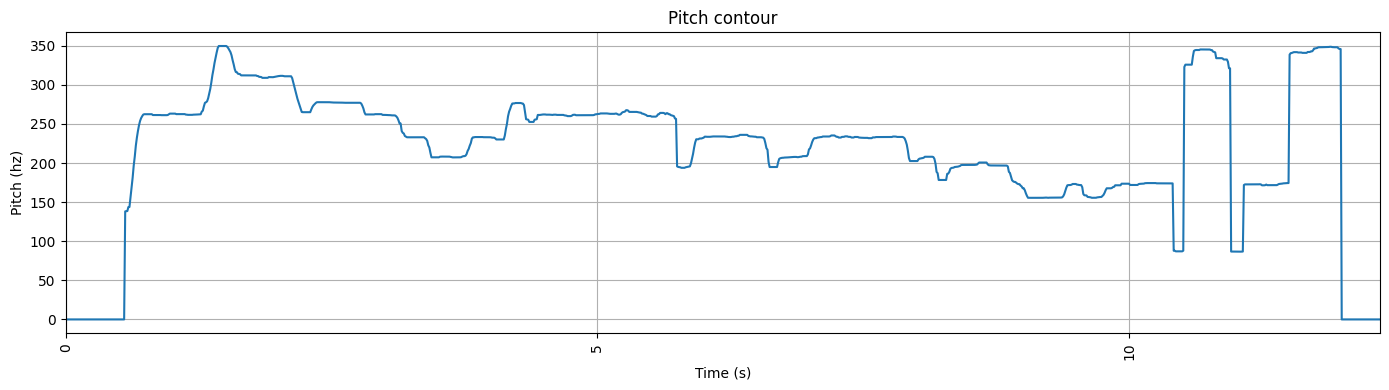

In [26]:
figPitchContour

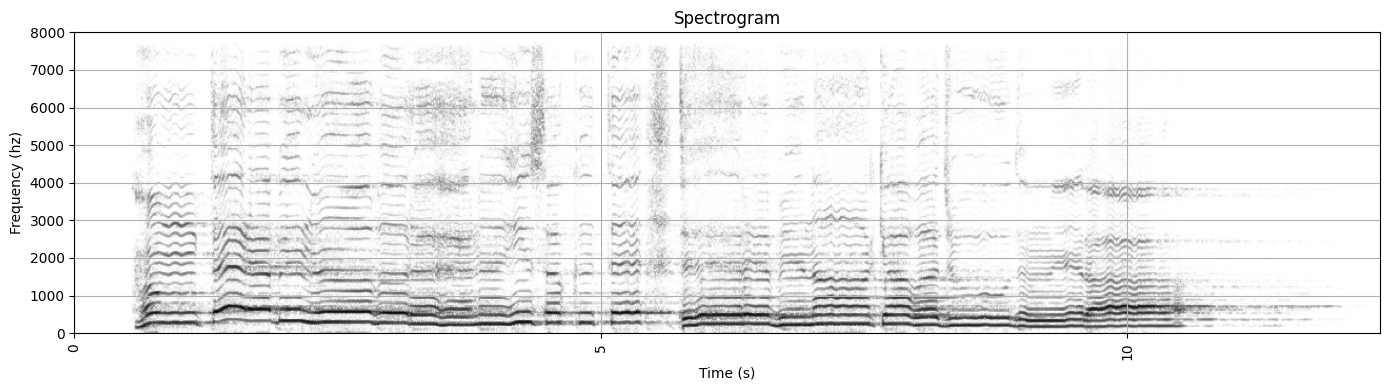

In [27]:
figSpectrogram

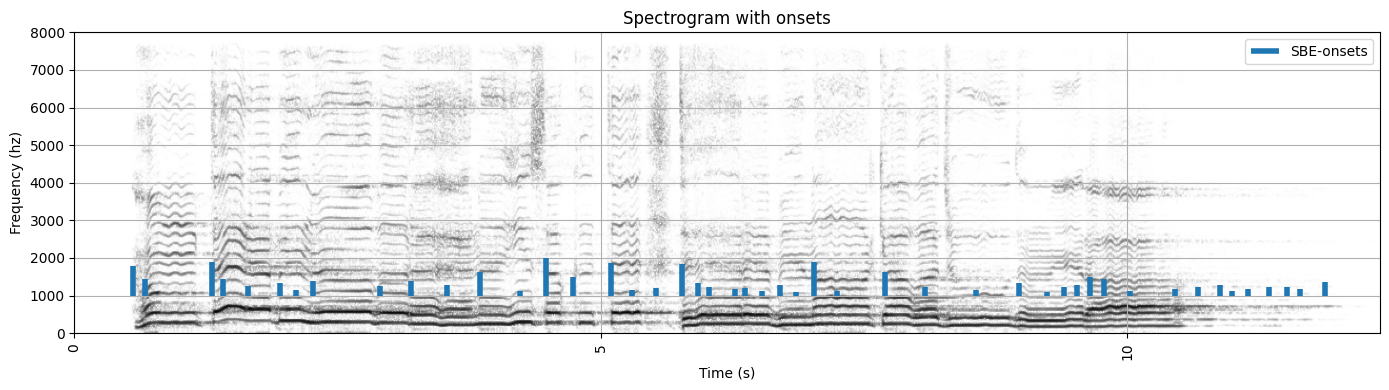

In [28]:
figVowelOnsets